In [6]:
!pip install opencv-python
!pip install mediapipe
!pip install scikit-learn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

In [3]:
df = pd.read_excel('./data/data.xlsx')

print(df.head())

   Unnamed: 0        file  label  \
0         0.0  2_1160.png      6   
1         1.0  2_1161.png      6   
2         2.0  2_1164.png      6   
3         3.0  2_1162.png      6   
4         4.0  2_1163.png      6   

                                                path  \
0  /content/drive/MyDrive/Компьютерный сурдопере...   
1  /content/drive/MyDrive/Компьютерный сурдопере...   
2  /content/drive/MyDrive/Компьютерный сурдопере...   
3  /content/drive/MyDrive/Компьютерный сурдопере...   
4  /content/drive/MyDrive/Компьютерный сурдопере...   

                                           landmarks  
0  [0.5401665568351746, 0.588716983795166, -1.158...  
1  [0.5398691296577454, 0.583844006061554, -8.266...  
2  [0.5425159335136414, 0.589148759841919, -2.952...  
3  [0.5405563712120056, 0.5917762517929077, -3.26...  
4  [0.5425992608070374, 0.5869975090026855, -2.68...  


In [4]:
def modify_path(path):
    index = path.find('/Train/')

    if index != -1:
        return './data' + path[index:]
    else:
        return path

In [6]:
df['path'] = df['path'].apply(modify_path)

print(df.head())

   Unnamed: 0        file  label                       path  \
0         0.0  2_1160.png      6  ./data/Train/6/2_1160.png   
1         1.0  2_1161.png      6  ./data/Train/6/2_1161.png   
2         2.0  2_1164.png      6  ./data/Train/6/2_1164.png   
3         3.0  2_1162.png      6  ./data/Train/6/2_1162.png   
4         4.0  2_1163.png      6  ./data/Train/6/2_1163.png   

                                           landmarks  
0  [0.5401665568351746, 0.588716983795166, -1.158...  
1  [0.5398691296577454, 0.583844006061554, -8.266...  
2  [0.5425159335136414, 0.589148759841919, -2.952...  
3  [0.5405563712120056, 0.5917762517929077, -3.26...  
4  [0.5425992608070374, 0.5869975090026855, -2.68...  


In [7]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5
)

In [8]:
data = []
labels = []

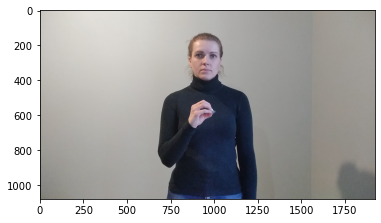

In [9]:
image = cv2.imread(df['path'][0])

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = hands.process(image_rgb)
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        for landmark in hand_landmarks.landmark:
            x, y = landmark.x, landmark.y

plt.imshow(image_rgb)
plt.show()

In [19]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )
    
    cv2.imshow('Hand Tracking', frame)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    